## Step 1: Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.ticker import FuncFormatter

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

## Step 2: Loading the Dataset

In [3]:
disney = pd.read_csv(r'disney_movies.csv')
disney

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


## Step 3: Exploring the Dataset

In [4]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [5]:
disney.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [6]:
disney.isna().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [7]:
# Calculate the percentage of missing values for each column
missing_percentage = disney.isnull().sum() / len(disney) * 100

# Display the percentage of missing values
print(missing_percentage)

movie_title                0.00
release_date               0.00
genre                      2.94
mpaa_rating                9.67
total_gross                0.00
inflation_adjusted_gross   0.00
dtype: float64


In [8]:
disney.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')

## Step 4: Converting release_date to Datetime

In [9]:
disney['release_date'].dtype

dtype('O')

In [10]:
# Change the 'release_date' column to datetime
disney['release_date'] = pd.to_datetime(disney['release_date'])
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     562 non-null    object        
 3   mpaa_rating               523 non-null    object        
 4   total_gross               579 non-null    int64         
 5   inflation_adjusted_gross  579 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.3+ KB


## Step 5: Analyzing Columns

### Check for duplicates in movie_title:

In [11]:
# Count unique movie titles and check for duplicates
unique_titles_count = disney['movie_title'].nunique()
print(f"Unique titles: {unique_titles_count}")

Unique titles: 573


### Further investigation on Genre for NaN and Missing Values

In [12]:
# Get the frequency count of unique genres
genre_counts = disney['genre'].value_counts(dropna=False)
print(genre_counts)

genre
Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
NaN                     17
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: count, dtype: int64


**NOTE: We have total 17 NaN Values.**

### Further investigation on Rating for NaN and Missing Values

In [13]:
mpaa_rating_counts = disney['mpaa_rating'].value_counts(dropna=False)
print(mpaa_rating_counts)

mpaa_rating
PG           187
PG-13        145
R            102
G             86
NaN           56
Not Rated      3
Name: count, dtype: int64


**NOTE: The "NaN" and "Not Rated" together are both considered missing values. So, we can combine them. The total will be 59.**

## Step 6: Finding Duplicate Titles

In [14]:
# Get the counts of each movie title
title_counts = disney['movie_title'].value_counts(dropna=False)
title_counts

movie_title
The Jungle Book                 3
Freaky Friday                   2
Cinderella                      2
Bad Company                     2
101 Dalmatians                  2
                               ..
Quiz Show                       1
A Simple Twist of Fate          1
It's Pat                        1
Camp Nowhere                    1
Rogue One: A Star Wars Story    1
Name: count, Length: 573, dtype: int64

In [15]:
print(title_counts[title_counts > 1])

movie_title
The Jungle Book    3
Freaky Friday      2
Cinderella         2
Bad Company        2
101 Dalmatians     2
Name: count, dtype: int64


In [16]:
print(title_counts[title_counts > 1].index)

Index(['The Jungle Book', 'Freaky Friday', 'Cinderella', 'Bad Company',
       '101 Dalmatians'],
      dtype='object', name='movie_title')


In [17]:
# Find movie titles that appear more than once
duplicate_titles = title_counts[title_counts > 1].index

# Filter the DataFrame to include only rows with duplicate movie titles
duplicates_df = disney[disney['movie_title'].isin(duplicate_titles)]
display(duplicates_df)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
19,Freaky Friday,1977-01-21,Comedy,NaN,25942000,98067733
194,The Jungle Book,1994-12-25,Adventure,PG,44342956,88930321
196,Bad Company,1995-01-20,Thriller/Suspense,R,3523909,6829092
252,101 Dalmatians,1996-11-27,Comedy,G,136189294,258728898
364,Bad Company,2002-06-07,Action,PG-13,30157016,43756218
386,Freaky Friday,2003-08-06,Comedy,PG,110222438,154090360
556,Cinderella,2015-03-13,Drama,PG,201151353,201151353


## Step 7: Dealing with NaN and Not Rated Values

In [18]:
# Check for NaN values in both 'genre' and 'mpaa_rating' columns
disney['genre'] = disney['genre'].fillna('None')
disney['mpaa_rating'] = disney['mpaa_rating'].fillna('Not Rated')

# Ensure the data types are consistent to str
disney['genre'] = disney['genre'].astype(str)
disney['mpaa_rating'] = disney['mpaa_rating'].astype(str)

# Create the crosstab with all categories included
genre_rating_table = pd.crosstab(disney['genre'], disney['mpaa_rating'], dropna=False)

# Sort the index to match R output if necessary
genre_rating_table = genre_rating_table.sort_index()

# Print the crosstab
print(genre_rating_table)

mpaa_rating           G  Not Rated  PG  PG-13   R
genre                                            
Action                0          4   5     19  12
Adventure            42         10  57     17   3
Black Comedy          0          0   0      0   3
Comedy               17         21  77     37  30
Concert/Performance   2          0   0      0   0
Documentary          10          1   5      0   0
Drama                 5         11  28     37  33
Horror                0          1   0      1   4
Musical               9          2   4      1   0
None                  0          7   2      4   4
Romantic Comedy       1          1   7     12   2
Thriller/Suspense     0          1   1     13   9
Western               0          0   1      4   2


**NOTE: So, fillna('Not Rated') method combines those values together and now total is 59.**

## Step 8: Checking Frequency and Creating New Columns

### Frequency Table of Genres:

In [19]:
# Create a frequency table of genres
genre_counts = disney['genre'].value_counts()

# Separate 'None' from other genres
none_count = genre_counts.get('None', 0)  # Get the count for 'None'
genre_counts = genre_counts.drop('None')  # Remove 'None' from the frequency table

# Sort genres by frequency (numerical order)
genre_counts = genre_counts.sort_values(ascending=False)

# Add 'None' back at the end
genre_counts['None'] = none_count

# Print the frequency table
print(genre_counts)

genre
Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
None                    17
Name: count, dtype: int64


### Combining Lower Genres:

In [20]:
# Replace specific genres with broader categories
disney.loc[disney['genre'] == "Black Comedy", 'genre'] = "Comedy"
disney.loc[disney['genre'] == "Concert/Performance", 'genre'] = "Musical"
disney.loc[disney['genre'] == "Horror", 'genre'] = "Thriller/Suspense"
disney.loc[disney['genre'] == "Western", 'genre'] = "Adventure"

<strong>RESULTS</strong><br>
I Considered grouping some of the lower frequency genres with larger groups:<br>
* Black Comedy (count=3) --> combine with Comedy<br>
* Concert/Performance (count=2) --> combine with Musical<br>
* Horror (count=6) --> combine with Thriller/Suspense<br>
* Western (count = 7) --> combine with Adventure</strong>

### Frequency Table of MPAA Ratings:

In [21]:
# Create a frequency table of MPAA ratings
rating_counts = disney['mpaa_rating'].value_counts()

# Separate 'Not Rated' from other ratings
not_rated_count = rating_counts.get('Not Rated', 0)  # Get the count for 'Not Rated'
rating_counts = rating_counts.drop('Not Rated')      # Remove 'Not Rated' from the frequency table

# Sort ratings by frequency (numerical order)
rating_counts = rating_counts.sort_values(ascending=False)

# Add 'Not Rated' back at the end
rating_counts['Not Rated'] = not_rated_count

# Print the frequency table
print(rating_counts)

mpaa_rating
PG           187
PG-13        145
R            102
G             86
Not Rated     59
Name: count, dtype: int64


<strong>RESULTS</strong><br>
Because of high frequency numbers, I did not combine any rating.

### Frequency of the release_date

In [22]:
# Extract the year from 'release_date' and create a new 'year' column
disney['year'] = disney['release_date'].dt.year

# Get the frequency table of 'year'
year_counts = disney['year'].value_counts().sort_index()

print(year_counts)

year
1937     1
1940     2
1946     1
1950     1
1954     1
1955     1
1959     1
1961     3
1962     1
1963     1
1967     1
1968     1
1970     2
1971     1
1975     1
1977     4
1979     1
1980     2
1981     4
1982     3
1983     4
1984     2
1985     6
1986     7
1987    10
1988    12
1989    11
1990    15
1991    16
1992    22
1993    27
1994    30
1995    32
1996    28
1997    23
1998    22
1999    21
2000    19
2001    14
2002    22
2003    19
2004    19
2005    17
2006    19
2007    14
2008    13
2009    16
2010    14
2011    14
2012    10
2013    11
2014    12
2015    11
2016    14
Name: count, dtype: int64


### Combining years and Creating a New Column:

In [23]:
# Create a new 'year2' column with default value as an empty string
disney['year2'] = ""

# Apply conditions to categorize years
disney.loc[disney['year'] < 1980, 'year2'] = "Pre-1980"
disney.loc[(disney['year'] >= 1980) & (disney['year'] < 1990), 'year2'] = "1980-1990"
disney.loc[(disney['year'] >= 1990) & (disney['year'] < 1995), 'year2'] = "1990-1995"
disney.loc[(disney['year'] >= 1995) & (disney['year'] < 2000), 'year2'] = "1995-2000"
disney.loc[(disney['year'] >= 2000) & (disney['year'] < 2005), 'year2'] = "2000-2005"
disney.loc[(disney['year'] >= 2005) & (disney['year'] < 2010), 'year2'] = "2005-2010"
disney.loc[disney['year'] >= 2010, 'year2'] = "2010-2016"

# Get the frequency table of 'year2'
year2_counts = disney['year2'].value_counts().sort_index()

print(year2_counts)

year2
1980-1990     61
1990-1995    110
1995-2000    126
2000-2005     93
2005-2010     79
2010-2016     86
Pre-1980      24
Name: count, dtype: int64


## Step 9: Summary Stats and Visualizations

### Summary Stats of Total Gross and Inflation Adjusted Gross:

In [24]:
numeric_stats = disney[['total_gross', 'inflation_adjusted_gross']].describe()
print(numeric_stats)

       total_gross  inflation_adjusted_gross
count       579.00                    579.00
mean   64701788.52              118762523.31
std    93013006.12              286085280.04
min           0.00                      0.00
25%    12788864.00               22741232.00
50%    30702446.00               55159783.00
75%    75709033.00              119202000.00
max   936662225.00             5228953251.00


### Histogram for Total Gross:

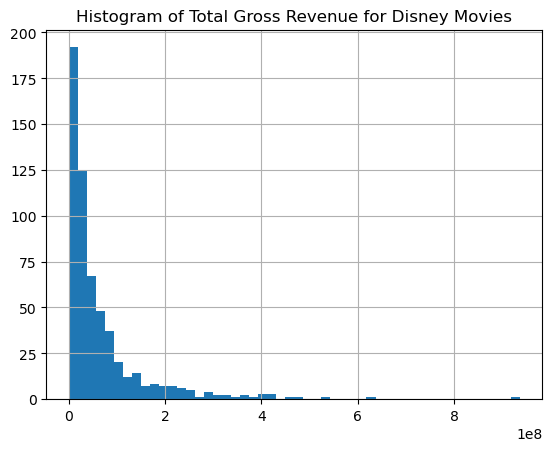

In [25]:
# Create a histogram of the 'total_gross' column
disney['total_gross'].hist(bins=50)

# Add a title to the plot
plt.title('Histogram of Total Gross Revenue for Disney Movies')

# Show the plot
plt.show()

### Histogram for Inflation Adjusted Gross:

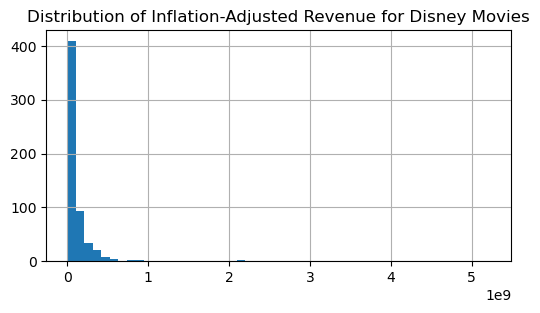

In [26]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(6, 3))  # Width and height in inches

# Create a histogram of the 'inflation_adjusted_gross' column
disney['inflation_adjusted_gross'].hist(bins=50)  

# Add a title to the plot
plt.title('Distribution of Inflation-Adjusted Revenue for Disney Movies')

# Show the plot
plt.show()

### Grouped by Mean Genre:

In [27]:
grouped_means = disney.groupby('genre', dropna=False).agg({
    disney.columns[4]: 'mean', disney.columns[5]: 'mean'})
print(grouped_means)

                   total_gross  inflation_adjusted_gross
genre                                                   
Action            104614082.05              137473419.65
Adventure         123147653.76              184396883.12
Comedy             44417096.70               84141931.83
Documentary        11292851.19               12718026.12
Drama              36026078.68               71893021.79
Musical            70041145.61              542910414.11
None                6943941.94               21623728.47
Romantic Comedy    50095950.22               77777084.04
Thriller/Suspense  49795846.37               76405801.53


### Ranking Grouped by Mean Genre:

In [28]:
# Step 1: Rank genres independently by total_gross and inflation_adjusted_gross
grouped_means['rank_total_gross'] = grouped_means['total_gross'].rank(ascending=False)
print("rank_total_gross:", grouped_means['rank_total_gross'])

grouped_means['rank_inflation_adjusted'] = grouped_means['inflation_adjusted_gross'].rank(ascending=False)
print("rank_inflation_adjusted:", grouped_means['rank_inflation_adjusted'])

# Step 2: Combine the ranks (e.g., sum of ranks)
grouped_means['combined_rank'] = grouped_means['rank_total_gross'] + grouped_means['rank_inflation_adjusted']
print(grouped_means['combined_rank'])

rank_total_gross: genre
Action              2.00
Adventure           1.00
Comedy              6.00
Documentary         8.00
Drama               7.00
Musical             3.00
None                9.00
Romantic Comedy     4.00
Thriller/Suspense   5.00
Name: rank_total_gross, dtype: float64
rank_inflation_adjusted: genre
Action              3.00
Adventure           2.00
Comedy              4.00
Documentary         9.00
Drama               7.00
Musical             1.00
None                8.00
Romantic Comedy     5.00
Thriller/Suspense   6.00
Name: rank_inflation_adjusted, dtype: float64
genre
Action               5.00
Adventure            3.00
Comedy              10.00
Documentary         17.00
Drama               14.00
Musical              4.00
None                17.00
Romantic Comedy      9.00
Thriller/Suspense   11.00
Name: combined_rank, dtype: float64


### Sorted Ranking Grouped by Mean Genre:

In [29]:
# Step 3: Sort by the combined rank
sorted_grouped_means = grouped_means.sort_values(by='combined_rank')

# Print the sorted DataFrame
print(sorted_grouped_means)

                   total_gross  inflation_adjusted_gross  rank_total_gross  \
genre                                                                        
Adventure         123147653.76              184396883.12              1.00   
Musical            70041145.61              542910414.11              3.00   
Action            104614082.05              137473419.65              2.00   
Romantic Comedy    50095950.22               77777084.04              4.00   
Comedy             44417096.70               84141931.83              6.00   
Thriller/Suspense  49795846.37               76405801.53              5.00   
Drama              36026078.68               71893021.79              7.00   
Documentary        11292851.19               12718026.12              8.00   
None                6943941.94               21623728.47              9.00   

                   rank_inflation_adjusted  combined_rank  
genre                                                      
Adventure            

### Stack Bar Chart for Sorted Ranking Grouped by Mean Genre:

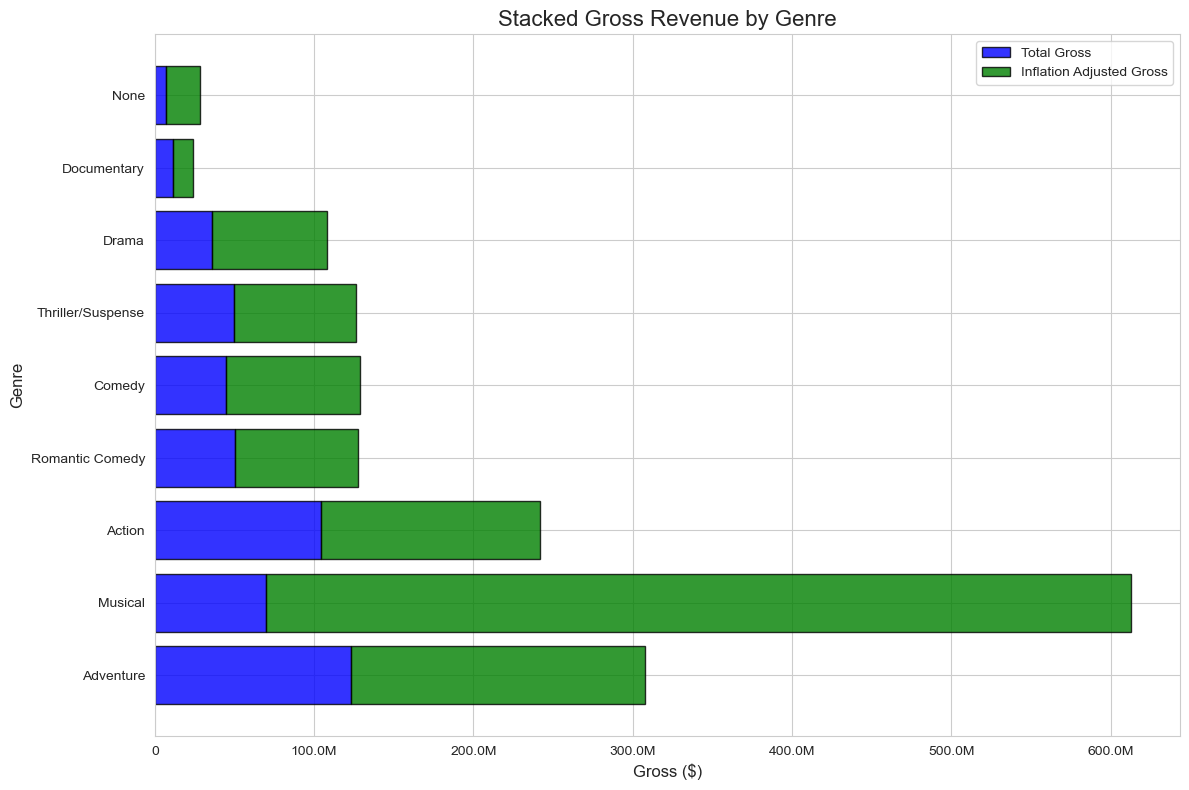

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format x-axis values
def format_x_axis(value, _):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'  # Billion
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'  # Million
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'  # Thousand
    else:
        return f'{value:.0f}'  # No suffix

# Set a style for the plots
sns.set_style("whitegrid")

# Extract sorted data
genres = sorted_grouped_means.index
total_gross = sorted_grouped_means['total_gross']
inflation_adjusted_gross = sorted_grouped_means['inflation_adjusted_gross']

# Create a horizontal stacked bar chart
plt.figure(figsize=(12, 8))  # Adjust figure size for better proportions

# Plot stacked horizontal bars
plt.barh(genres, total_gross, color='blue', alpha=0.8, edgecolor='black', label='Total Gross')
plt.barh(genres, inflation_adjusted_gross, left=total_gross, color='green', alpha=0.8, edgecolor='black',
         label='Inflation Adjusted Gross')

# Add titles and labels
plt.title('Stacked Gross Revenue by Genre', fontsize=16)
plt.xlabel('Gross ($)', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Format x-axis with K, M, B suffixes
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_axis))

# Add legend
plt.legend(fontsize=10)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()


### Median by Rating:

In [31]:
grouped_medians = disney.groupby('mpaa_rating', dropna=False).agg({
    disney.columns[4]: 'median', disney.columns[5]: 'median'})
print(grouped_medians)

             total_gross  inflation_adjusted_gross
mpaa_rating                                       
G            65140890.50              103154765.50
Not Rated    12706478.00               32798382.00
PG           50047179.00               69055550.00
PG-13        32680633.00               51373912.00
R            19168928.50               31587673.50


### Sorted Median Rating:

In [32]:
# Sort by both columns in descending order
sorted_grouped_medians = grouped_medians.sort_values(
    by=[disney.columns[4], disney.columns[5]], 
    ascending=False
)

print(sorted_grouped_medians)

             total_gross  inflation_adjusted_gross
mpaa_rating                                       
G            65140890.50              103154765.50
PG           50047179.00               69055550.00
PG-13        32680633.00               51373912.00
R            19168928.50               31587673.50
Not Rated    12706478.00               32798382.00


### Bar Chart for Sorted Median mpaa_rating:

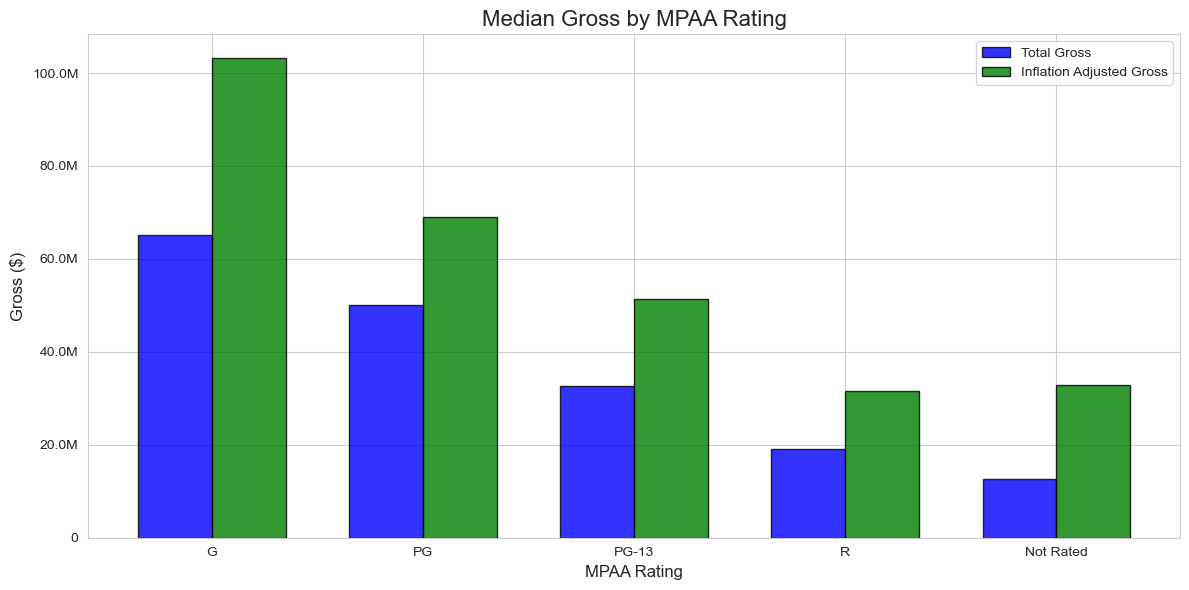

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format y-axis values
def format_y_axis(value, _):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'  # Billion
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'  # Million
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'  # Thousand
    else:
        return f'{value:.0f}'  # No suffix

# Set a style for the plots
sns.set_style("whitegrid")

# Create a bar chart to visualize the data
plt.figure(figsize=(12, 6))  # Adjust figure size for better proportions

# Plot total_gross and inflation_adjusted_gross as grouped bars
x = sorted_grouped_medians.index  # MPAA ratings (categories)
total_gross = sorted_grouped_medians['total_gross']
inflation_adjusted_gross = sorted_grouped_medians['inflation_adjusted_gross']

bar_width = 0.35  # Adjust bar width for better proportions
indices = range(len(x))  # Positions for the bars

# Plot the bars for total_gross
plt.bar([i - bar_width / 2 for i in indices], total_gross, width=bar_width, 
        label='Total Gross', color='blue', alpha=0.8, edgecolor='black')

# Plot the bars for inflation_adjusted_gross (next to total_gross)
plt.bar([i + bar_width / 2 for i in indices], inflation_adjusted_gross, 
        width=bar_width, label='Inflation Adjusted Gross', color='green', alpha=0.8, edgecolor='black')

# Add titles and labels
plt.title('Median Gross by MPAA Rating', fontsize=16)
plt.xlabel('MPAA Rating', fontsize=12)
plt.ylabel('Gross ($)', fontsize=12)
plt.xticks(indices, x, fontsize=10)  # Center the labels between bars
plt.legend(fontsize=10)

# Format y-axis with K, M, B suffixes
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

#### Total by Combined Year (year2):

In [34]:
grouped_sums = disney.groupby(disney['year2']).agg({
    disney.columns[4]: 'sum', 
    disney.columns[5]: 'sum'
})
print(grouped_sums)

           total_gross  inflation_adjusted_gross
year2                                           
1980-1990   2114540747                4636550126
1990-1995   3909348889                7752004425
1995-2000   5499197391                9991300084
2000-2005   5861459834                8430031336
2005-2010   6018210432                7361472013
2010-2016  12779742349               13150493912
Pre-1980    1279835911               17441649101


#### Sorted Total by Combined Year (year2):

In [35]:
# Sort the results by 'release_date' in descending order
sorted_grouped_sums = grouped_sums.sort_index(ascending=False)

print(sorted_grouped_sums)

           total_gross  inflation_adjusted_gross
year2                                           
Pre-1980    1279835911               17441649101
2010-2016  12779742349               13150493912
2005-2010   6018210432                7361472013
2000-2005   5861459834                8430031336
1995-2000   5499197391                9991300084
1990-1995   3909348889                7752004425
1980-1990   2114540747                4636550126


#### Line Chart for Sorted Total by Combined Year (year2):

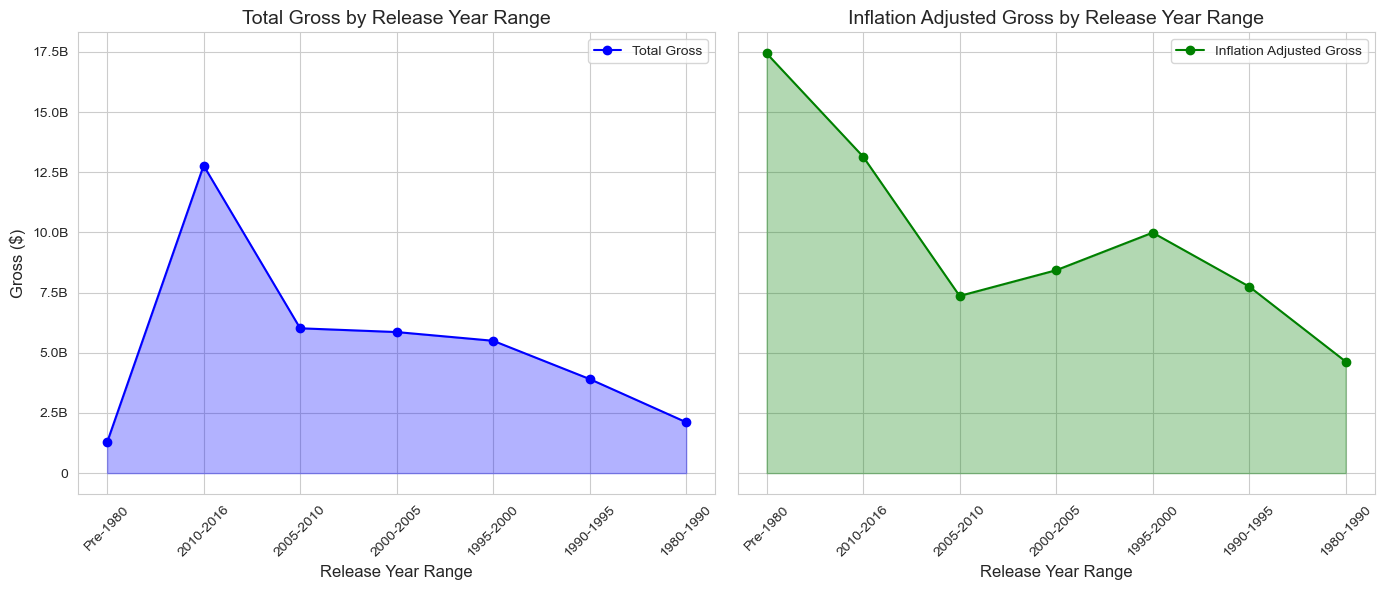

In [36]:
# Function to format y-axis values
def format_y_axis(value, _):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'  # Billion
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'  # Million
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'  # Thousand
    else:
        return f'{value:.0f}'  # No suffix

# Set a style for the plots
sns.set_style("whitegrid")

# Extract sorted data
x = sorted_grouped_sums.index  # Year categories
total_gross = sorted_grouped_sums['total_gross']
inflation_adjusted_gross = sorted_grouped_sums['inflation_adjusted_gross']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # Two side-by-side plots

# Plot filled line for total_gross
axes[0].plot(x, total_gross, color='blue', marker='o', linestyle='-', label='Total Gross')
axes[0].fill_between(x, total_gross, color='blue', alpha=0.3)  # Fill area below the line
axes[0].set_title('Total Gross by Release Year Range', fontsize=14)
axes[0].set_xlabel('Release Year Range', fontsize=12)
axes[0].set_ylabel('Gross ($)', fontsize=12)
axes[0].yaxis.set_major_formatter(FuncFormatter(format_y_axis))  # Format y-axis
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
axes[0].legend()

# Plot filled line for inflation_adjusted_gross
axes[1].plot(x, inflation_adjusted_gross, color='green', marker='o', linestyle='-', 
             label='Inflation Adjusted Gross')
axes[1].fill_between(x, inflation_adjusted_gross, color='green', alpha=0.3)  # Fill area below the line
axes[1].set_title('Inflation Adjusted Gross by Release Year Range', fontsize=14)
axes[1].set_xlabel('Release Year Range', fontsize=12)
axes[1].yaxis.set_major_formatter(FuncFormatter(format_y_axis))  # Format y-axis
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
